----------------------------------
# Pima Indians Diabetes Analysis
----------------------------------


#####  Perform Exploratory Data Analysis to identify the impact of various attributes on the diabetes rates of the Pima Indians.

- This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases.
- Through the dataset we aim to get insights about the patterns in the disease, based on certain diagnostic measurements included in the dataset.
- Several constraints were placed on the selection of these instances from a larger database.
- In particular, all patients here are females at least 21 years old of Pima Indian heritage.
- The datasets consists of several medical predictor variables and one target variable.
- Predictor variables include the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.


--------------------------
### Attribute Information:
--------------------------

1. **Number of times pregnant**
2. **Plasma glucose concentration a 2 hours in an oral glucose tolerance test**
3. **Diastolic blood pressure (mm Hg)**
4. **Triceps skin fold thickness (mm):** Its thickness gives information about the fat reserves of the body
5. **2-Hour serum insulin (mu U/ml)**
6. **Body mass index (weight in kg/(height in m)^2)**
7. **Diabetes pedigree function**
8. **Age (years)**
9. **Class variable (0 or 1)**

------------------------
# Concepts to Cover
------------------------
- 1. <a href = #link1>Overview of the data</a>
- 2. <a href = #link2>Univariate and Bivariate Analysis</a>
- 3. <a href = #link3>Data Preprocessing</a>
- 4. <a href = #link4>Pandas Profiling</a> 

# Let's start coding!

<a id='link'></a>
### Import libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import necessary libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# To enable plotting graphs in Jupyter notebook
%matplotlib inline
import seaborn as sns

from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler, MinMaxScaler

### Think about it:

- Why we use StandardScalar and MinMaxScalar from sklearn library?

In [3]:
# Adjust pandas display and formatting settings

# Remove scientific notations and display numbers with 2 decimal points instead
pd.options.display.float_format = '{:,.2f}'.format        

# Increase cell width
# If you don't want to change your default settings, and you only want to change the width of 
# the current notebook you're working on, you can enter the following into a cell:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Update default style
# Set the aesthetic style of the plots.
# This affects things like the color of the axes, whether a grid is enabled by default, and other aesthetic elements.
sns.set_style(style='darkgrid')

### Load and explore the data

In [4]:
# Load the data into pandas dataframe
df = pd.read_csv("pima-indians-diabetes.csv")           # Make changes to the path depending on where your data file is stored.

# <a id='link1'>Overview of the data</a>

In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,6,148,72,35,0,33.60,0.63,50,1
1,1,85,66,29,0,26.60,0.35,31,0
2,8,183,64,0,0,23.30,0.67,32,1
3,1,89,66,23,94,28.10,0.17,21,0
4,0,137,40,35,168,43.10,2.29,33,1


## Think about it:

- What do you interpret by looking at the data in the first 5 rows?
- Do you see that each column has different scales of data.
    - e.g. "Pragnancies" column : from 0 to 8, as we can see.
    - Glucose: 85 to 183.
So, Consider two cases:
- Without scaling the data
- With using StandardScalar, MinMaxScalar

Will the result differ in each case or will be same?

In [6]:
# Check number of rows and columns
df.shape

(768, 9)

In [7]:
df.isnull().sum()

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
DPF              0
Age              0
Outcome          0
dtype: int64

In [8]:
# Check column types and missing values
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.00,3.85,3.37,0.00,1.00,3.00,6.00,17.00
Glucose,768.00,120.89,31.97,0.00,99.00,117.00,140.25,199.00
BloodPressure,768.00,69.11,19.36,0.00,62.00,72.00,80.00,122.00
SkinThickness,768.00,20.54,15.95,0.00,0.00,23.00,32.00,99.00
Insulin,768.00,79.80,115.24,0.00,0.00,30.50,127.25,846.00
BMI,768.00,31.99,7.88,0.00,27.30,32.00,36.60,67.10
DPF,768.00,0.47,0.33,0.08,0.24,0.37,0.63,2.42
Age,768.00,33.24,11.76,21.00,24.00,29.00,41.00,81.00
Outcome,768.00,0.35,0.48,0.00,0.00,0.00,1.00,1.00


In [9]:
df[df==0].count()

Pregnancies      111
Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
DPF                0
Age                0
Outcome          500
dtype: int64

Glucose = 5 with zeros - Data issues
BloodPressure - 35 with zeros - Data issues
SkinThickness - 227 zeros !!!
BMI - zeros

## Think about it:

- What are some other ways to check the missing values?

# <a id = "link2">Univariate and Bivariate Analysis</a>

- How to interpret the average of a binary field?
- What can we tell about the shape of distributions from the summary statistics above?

In [11]:
# Example of a binary array
a = [1,1,1,1,1,1,0,0,0,0]

# Find the average of the binary array
np.mean(a)

0.6

- Is the average above or below the median in the distribution above?

In [12]:
# Create summary statistics for numeric fields
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.00,3.85,3.37,0.00,1.00,3.00,6.00,17.00
Glucose,768.00,120.89,31.97,0.00,99.00,117.00,140.25,199.00
BloodPressure,768.00,69.11,19.36,0.00,62.00,72.00,80.00,122.00
SkinThickness,768.00,20.54,15.95,0.00,0.00,23.00,32.00,99.00
Insulin,768.00,79.80,115.24,0.00,0.00,30.50,127.25,846.00
BMI,768.00,31.99,7.88,0.00,27.30,32.00,36.60,67.10
DPF,768.00,0.47,0.33,0.08,0.24,0.37,0.63,2.42
Age,768.00,33.24,11.76,21.00,24.00,29.00,41.00,81.00
Outcome,768.00,0.35,0.48,0.00,0.00,0.00,1.00,1.00


#### Skewness of the variables

In [13]:
df.skew()

Pregnancies      0.90
Glucose          0.17
BloodPressure   -1.84
SkinThickness    0.11
Insulin          2.27
BMI             -0.43
DPF              1.92
Age              1.13
Outcome          0.64
dtype: float64

**If skewness value is zero, then it is not skewed**

**If it is less than zero, then negatively skewed (left tail) and if greater than zero then positively skewed (right tail)**

Some insights about data:

- Data for all the attributes are skewed, especially for the variable "Insulin".

- The mean for "Insulin" is 80(rounded) while the median is 30.5 which clearly indicates an extreme long tail on the right.

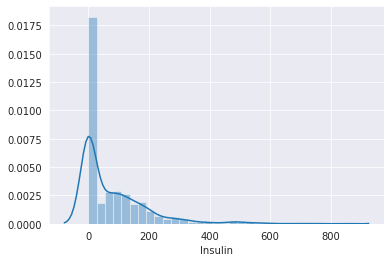

In [ ]:
# Example of a skewed distribution (right tail)

sns.distplot(df['Insulin'])
plt.show()

#### Incorrect Imputations

In [16]:
# Let us check whether any of the columns has any value other than numeric i.e. data is not corrupted such as a "?" instead of 
# a number.

# we use np.isreal a numpy function which checks each column for each row and returns a bool array, 
# where True if input element is real.
# applymap is pandas dataframe function that applies the np.isreal function elementwise

# Following line selects those rows which have some non-numeric value in any of the columns hence the  ~ symbol

df[~df.applymap(np.isreal).all(1)]

# this works only on continous columns.

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome


In [ ]:
df['Outcome'].value_counts()
# See distrubtion of target variable

0    500
1    268
Name: Outcome, dtype: int64

In [17]:
df['Outcome'].value_counts(normalize=True)*100
# See percentage distribution of target variable

0   65.10
1   34.90
Name: Outcome, dtype: float64

## Bivariate

In [ ]:
# Let us look at the target column 'Outcome' to understand how the data is distributed amongst the various fields
df.groupby(["Outcome"]).mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age
Outcome,,,,,,,,
0,3.30,109.98,68.18,19.66,68.79,30.30,0.43,31.19
1,4.87,141.26,70.82,22.16,100.34,35.14,0.55,37.07


In [ ]:
# Let us look at the target column 'Outcome' to understand how the data is distributed amongst the various fields
df.groupby(["Outcome"]).median()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age
Outcome,,,,,,,,
0,2,107,70,21,39,30.05,0.34,27
1,4,140,74,27,0,34.25,0.45,36


**All the features have higher mean for people having diabetes**

**All the features have higher median for people having diabetes except "Insulin" which is understood as diabetes patient do not produce insulin**

#### Pair plot

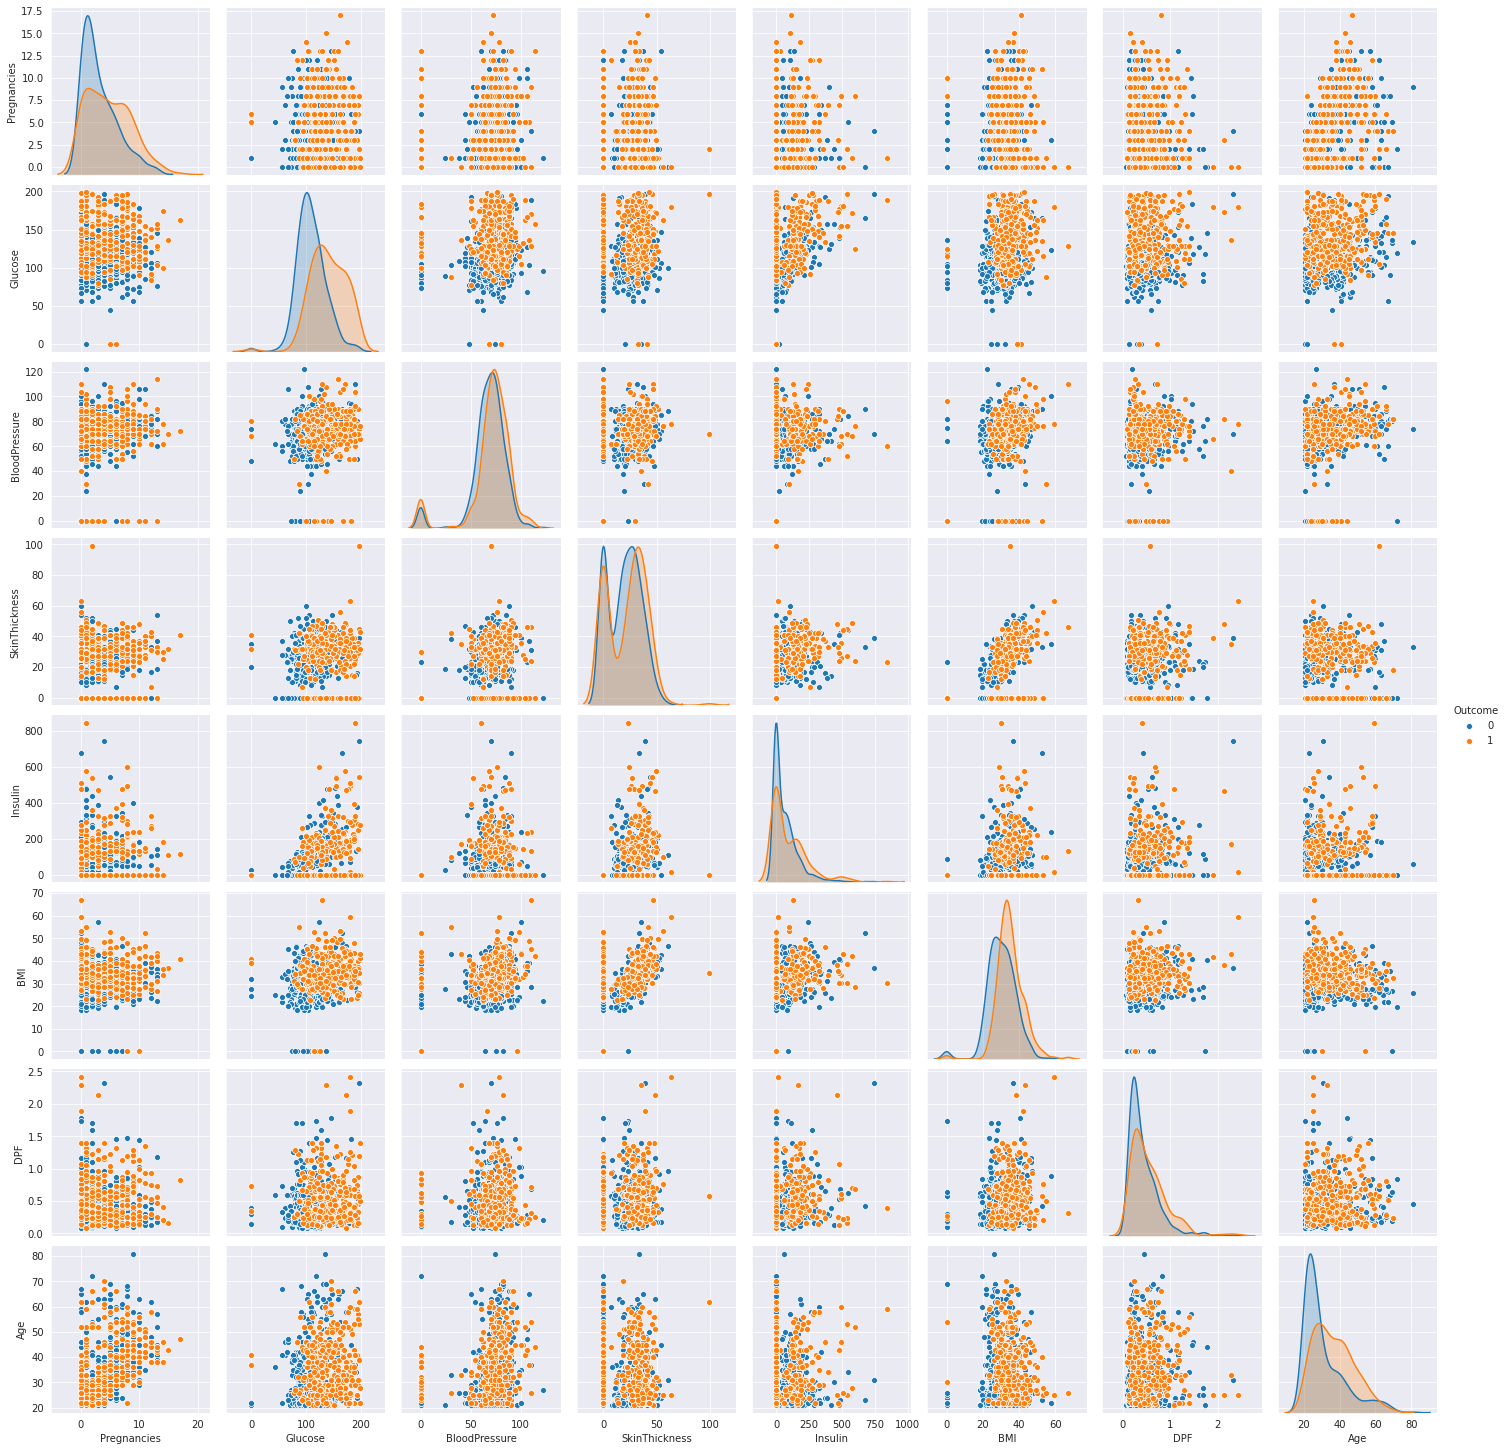

In [ ]:
# Check distributions by Outcome
sns.pairplot(df, hue = 'Outcome')
plt.show()

### No clear relationship for any feature.

### Number of people having diabetes are higher for people with higher "Age", "BMI" and "Glucose".

#### Correlation with target variable is signficant when target variable is continous

Here we can check if any feature is correlated amongst them.

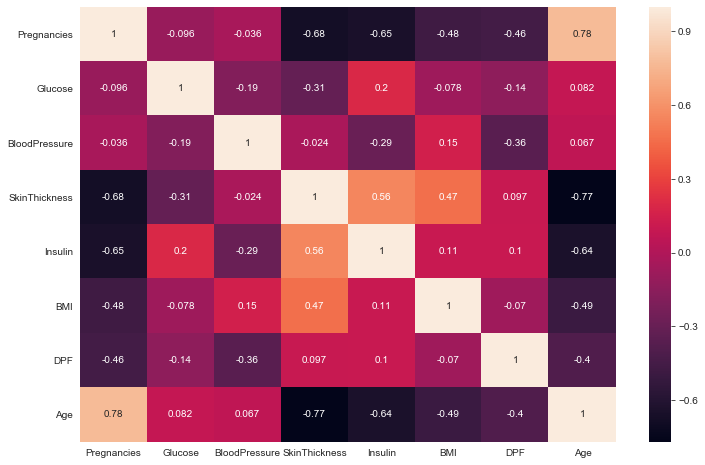

In [18]:
corr = df.drop('Outcome',axis=1).corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr.corr(), annot = True)
plt.show()

### No high correlation between features

# <a id='link3'>Data Preprocessing</a>

#### Exampes of data standardization using mean and standard deviation

In [21]:
# Multiple ways to implement Z score standardization

# Standardization of entire data set using "zscore" function from scipy.stats package 
df_z = df.apply(zscore)

# Manual standardization of individual fields
df['Age_Z_Manual'] = (df['Age']-np.mean(df['Age']))/np.std(df['Age'])

# Using "zscore" function from scipy.stats package 
df['Age_Z_Scipy'] = df[['Age']].apply(zscore)

# Using "StandardScaler" function from sklearn.preprocessing package - useful for machine learning models  
df['Age_Z_Sklearn'] = StandardScaler().fit_transform(df[['Age']])

In [ ]:
# View the new data set with all standardized fields
df_z.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,0.64,0.85,0.15,0.91,-0.69,0.20,0.47,1.43,1.37
1,-0.84,-1.12,-0.16,0.53,-0.69,-0.68,-0.37,-0.19,-0.73
2,1.23,1.94,-0.26,-1.29,-0.69,-1.10,0.60,-0.11,1.37
3,-0.84,-1.00,-0.16,0.15,0.12,-0.49,-0.92,-1.04,-0.73
4,-1.14,0.50,-1.50,0.91,0.77,1.41,5.48,-0.02,1.37


In [ ]:
# View existing data set with new Age standardized fields
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome,Age_Z_Manual,Age_Z_Scipy,Age_Z_Sklearn
0,6,148,72,35,0,33.60,0.63,50,1,1.43,1.43,1.43
1,1,85,66,29,0,26.60,0.35,31,0,-0.19,-0.19,-0.19
2,8,183,64,0,0,23.30,0.67,32,1,-0.11,-0.11,-0.11
3,1,89,66,23,94,28.10,0.17,21,0,-1.04,-1.04,-1.04
4,0,137,40,35,168,43.10,2.29,33,1,-0.02,-0.02,-0.02


### Zscore and Standard Scalar are same.

#### Exampes of data normalization using min and range

In [22]:
# Manual normalization
df['Age_Norm_Manual'] = (df['Age']-np.min(df['Age']))/(np.max(df['Age'])-np.min(df['Age']))

# Using "StandardScaler" function from sklearn.preprocessing package - useful for machine learning models  
df['Age_Norm_Sklearn'] = MinMaxScaler().fit_transform(df[['Age']])

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome,Age_Z_Manual,Age_Z_Scipy,Age_Z_Sklearn,Age_Norm_Manual,Age_Norm_Sklearn
0,6,148,72,35,0,33.60,0.63,50,1,1.43,1.43,1.43,0.48,0.48
1,1,85,66,29,0,26.60,0.35,31,0,-0.19,-0.19,-0.19,0.17,0.17
2,8,183,64,0,0,23.30,0.67,32,1,-0.11,-0.11,-0.11,0.18,0.18
3,1,89,66,23,94,28.10,0.17,21,0,-1.04,-1.04,-1.04,0.00,0.00
4,0,137,40,35,168,43.10,2.29,33,1,-0.02,-0.02,-0.02,0.20,0.20


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.00,3.85,3.37,0.00,1.00,3.00,6.00,17.00
Glucose,768.00,120.89,31.97,0.00,99.00,117.00,140.25,199.00
BloodPressure,768.00,69.11,19.36,0.00,62.00,72.00,80.00,122.00
SkinThickness,768.00,20.54,15.95,0.00,0.00,23.00,32.00,99.00
Insulin,768.00,79.80,115.24,0.00,0.00,30.50,127.25,846.00
BMI,768.00,31.99,7.88,0.00,27.30,32.00,36.60,67.10
DPF,768.00,0.47,0.33,0.08,0.24,0.37,0.63,2.42
Age,768.00,33.24,11.76,21.00,24.00,29.00,41.00,81.00
Outcome,768.00,0.35,0.48,0.00,0.00,0.00,1.00,1.00
Age_Z_Manual,768.00,0.00,1.00,-1.04,-0.79,-0.36,0.66,4.06


#### Exampe of data transformation using natural logarithm

In [23]:
# Log transformation of a skewed field using numpy log function
df['Age_Log'] = np.log(df['Age'])

# Log transformation of a skewed field with zeros
df['BloodPressure_Log'] = np.log(df['BloodPressure']+0.5)

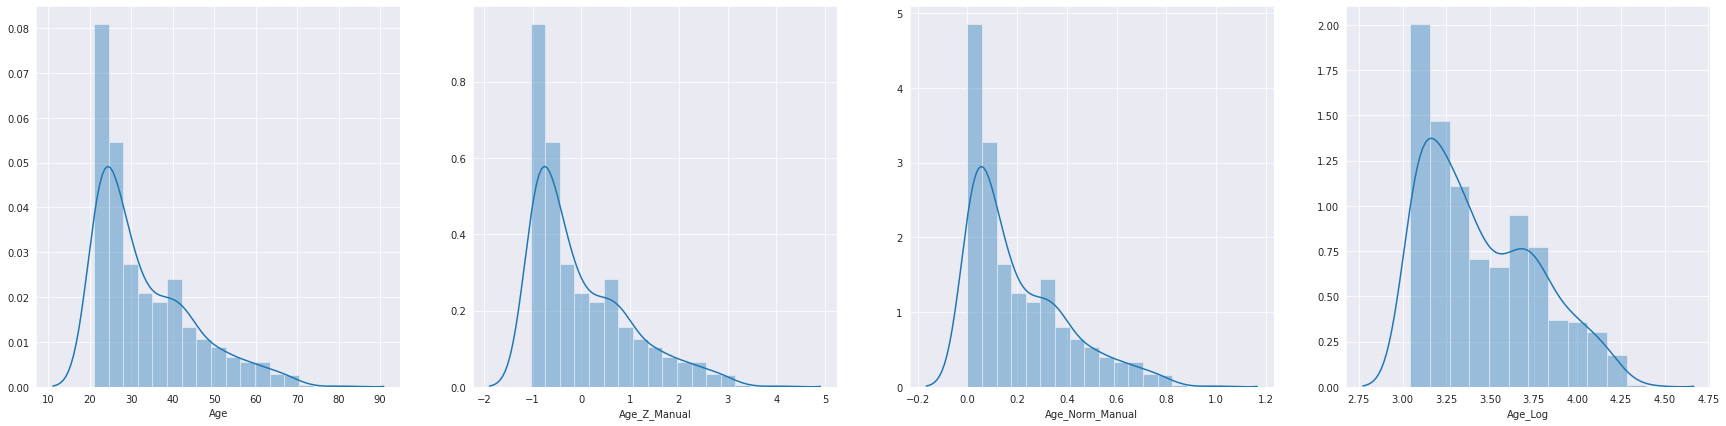

In [ ]:
# Let's plot original, standardized, normalized, and log transformed Age fields
fig, axs = plt.subplots(ncols = 4, figsize = (30, 7))

sns.distplot(df['Age'], ax = axs[0])
sns.distplot(df['Age_Z_Manual'], ax = axs[1])
sns.distplot(df['Age_Norm_Manual'], ax = axs[2])
sns.distplot(df['Age_Log'], ax = axs[3]);

In [24]:
# Let's replace "Outcome" field in the standardized dataset with the original "Outcome" field
df_z['Outcome'] = df['Outcome']

In [25]:
# Create a list with features for plotting boxplots
features = [col for col in df_z.columns if col != 'Outcome']

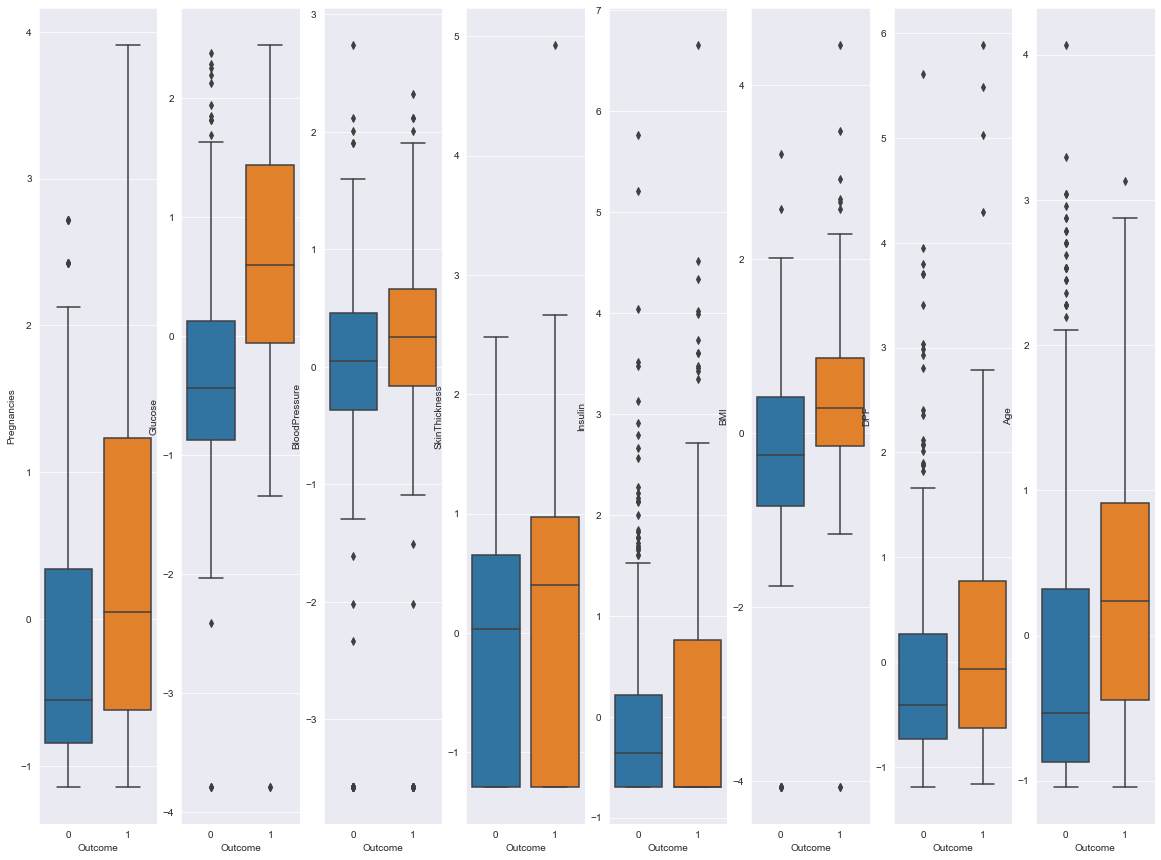

In [27]:
# Create boxplots to understand differences in distributions among people with and without diabetes
fig, axs = plt.subplots(ncols = len(features), figsize = (20, 15))

for idx, field in enumerate(features):
    sns.boxplot(x = 'Outcome', 
                y = field, 
                data = df_z,
                ax = axs[idx])

# <a id='link4'>Pandas Profiling</a>
#### Automated data profiling

In [30]:
# Loading dataframe again, so that original features are considered
data = pd.read_csv("pima-indians-diabetes.csv")

In [35]:
from pandas_profiling import ProfileReport
prof = ProfileReport(data)
prof
# to view report created by pandas profile

Number of variables,9
Number of observations,768
Total Missing (%),0.0%
Total size in memory,54.1 KiB
Average record size in memory,72.1 B
Numeric,8
Categorical,0
Boolean,1
Date,0
Text (Unique),0
Rejected,0


In [34]:
prof.to_file(outputfile='output.html')
# to save report obtained via pandas profiling

# Appendix



- **warnings.filterwarnings("ignore")** : Never print matching warnings
- **Pandas** : Pandas is an open source library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language.
- **Numpy** : The fundamental package for scientific computing with Python.
- **Matplotlib** : Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python.
- **Seaborn** : Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.
- **scipy.stats** : This module contains a large number of probability distributions as well as a growing library of statistical functions.
- **sklearn.preprocessing** : This package provides several common utility functions and transformer classes to change raw feature vectors into a representation that is more suitable for the downstream estimators.